# Package

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lecture de données

In [41]:
#lecture du fichier

# base =  pd.read_csv("C:/Users/Cyrie/OneDrive/Bureau/M2_DS/S1/MLOPS/athlete_events.csv")  
base = pd.read_csv("/Users/lepercqlouise/stockage_macBook/Rendu_MLOPS/athlete_events.csv")


# Filtre sur Summer

In [42]:
#filtre sur Summer
base_summer = base[base['Season'] == 'Summer']

#nombre de ligne de notre df base après filtre du df base summer
nombre_de_lignes1 = base_summer.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes1)

Nombre de lignes : 222552


# Valeurs manquantes et abbérantes du df base_summer

In [43]:
#valeurs manquantes pour le df base summer
valeurs_manquantes_par_variable1 = base_summer.isnull().sum()

# Affichage du résultat pour le df base summer
print(valeurs_manquantes_par_variable1)

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64


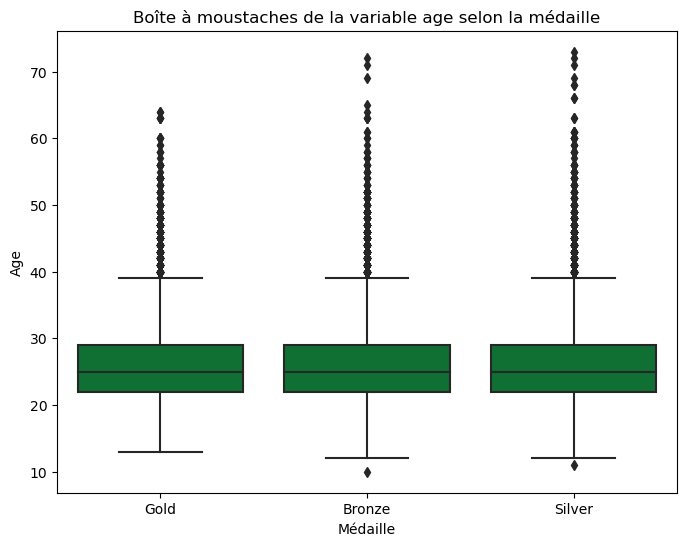

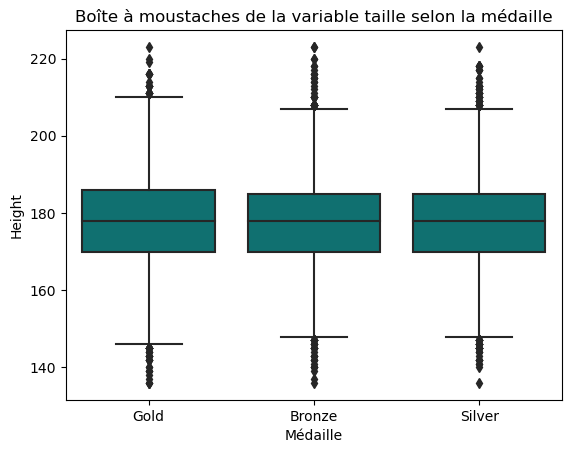

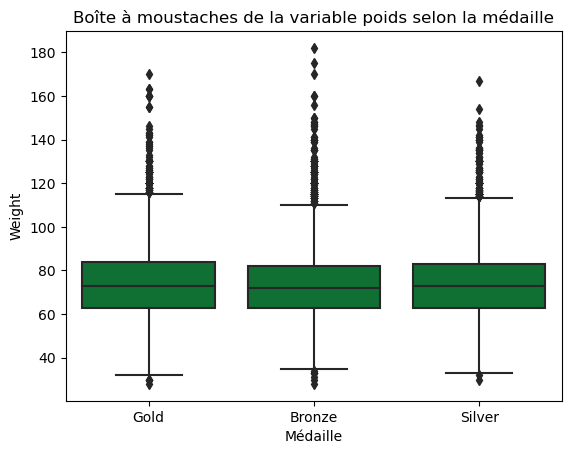

In [44]:
#valeur abbérentes
# Création de la figure et des axes
plt.figure(figsize=(8, 6))

###################AGE#####################
# Création de la boîte à moustaches 
sns.boxplot(x=base_summer['Medal'], y=base_summer['Age'], color='#008030')

# Titres et labels
plt.title('Boîte à moustaches de la variable age selon la médaille')
plt.xlabel('Médaille')
plt.show()

###################Height####################
# Création de la boîte à moustaches 
sns.boxplot(x=base_summer['Medal'], y=base_summer['Height'], color='#008080')

# Titres et labels
plt.title('Boîte à moustaches de la variable taille selon la médaille')
plt.xlabel('Médaille')
plt.show()


###################Weight####################
# Création de la boîte à moustaches 
sns.boxplot(x=base_summer['Medal'], y=base_summer['Weight'], color='#008030')

# Titres et labels
plt.title('Boîte à moustaches de la variable poids selon la médaille')
plt.xlabel('Médaille')
plt.show()




In [45]:
#lecture des valeurs abbérantes
# Filtre sur les enregistrements où l'âge est supérieur à 40 et inférieur à 11 ans
base_summer_age_11_40 = base_summer[(base_summer['Age'] > 40) | (base_summer['Age'] < 11)]
print("DataFrame pour l'âge entre 11 et 40 ans inclus:")
print(base_summer_age_11_40)

# Filtre sur les enregistrements où la taille est inférieure à 145 cm et supérieure à 210 cm
base_summer_height_145_210 = base_summer[(base_summer['Height'] > 210) | (base_summer['Height'] < 145)]
print("\nDataFrame pour la taille entre 145 et 210 cm inclus:")
print(base_summer_height_145_210)

# Filtre sur les enregistrements où le poids est inférieur à 35 kg et supérieur à 118 kg
base_summer_weight_35_118 = base_summer[(base_summer['Weight'] > 118) | (base_summer['Weight'] < 35)]
print("\nDataFrame pour le poids entre 35 et 118 kg inclus:")
print(base_summer_weight_35_118)


DataFrame pour l'âge entre 11 et 40 ans inclus:
            ID                                       Name Sex   Age  Height  \
58          19                      Win Valdemar Aaltonen   M  54.0     NaN   
89          28                           Jan-Erik Aarberg   M  43.0   170.0   
90          28                           Jan-Erik Aarberg   M  47.0   170.0   
124         45                                Hakon Aasns   M  41.0     NaN   
126         46                                 Hans Aasns   M  45.0   194.0   
...        ...                                        ...  ..   ...     ...   
270752  135406                              Bla Zulawszky   M  42.0     NaN   
270753  135406                              Bla Zulawszky   M  42.0     NaN   
270955  135494                               Jacek uawski   M  41.0     NaN   
270971  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  43.0   183.0   
270972  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  47.0   183.0   

   

# Regroupements

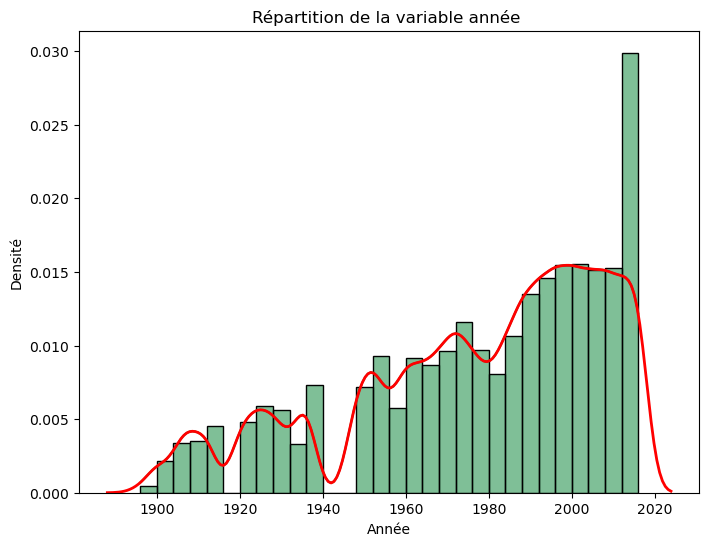

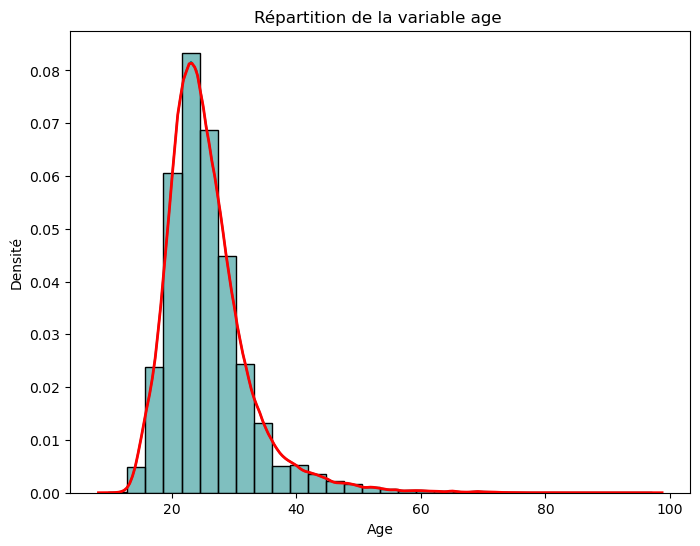

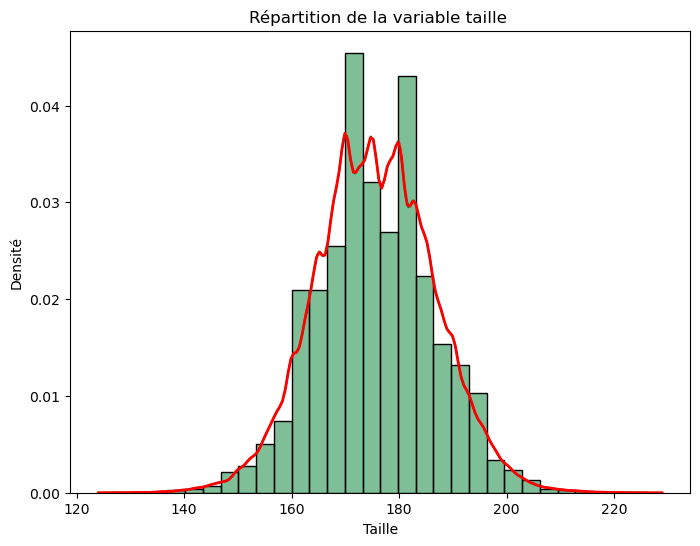

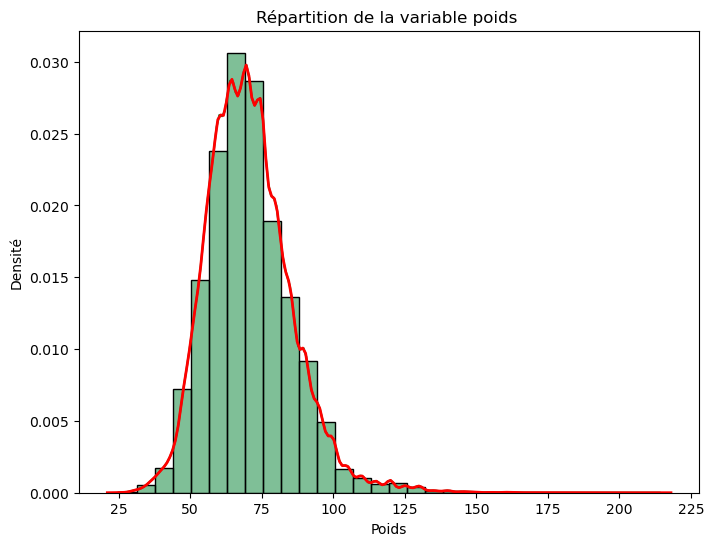

In [46]:
#voir la répartiton des variables quantitatives avant le regroupement
###################YEAR####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Year'], bins=30, kde=True, color='#008030', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Year'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable année ')
plt.xlabel('Année')
plt.ylabel('Densité')
plt.show()

###################AGE#####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Age'], bins=30, kde=True, color='#008080', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Age'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable age ')
plt.xlabel('Age')
plt.ylabel('Densité')
plt.show()

###################HEIGHT#####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Height'], bins=30, kde=True, color='#008030', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Height'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable taille ')
plt.xlabel('Taille')
plt.ylabel('Densité')
plt.show()

###################WEIGHT#####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Weight'], bins=30, kde=True, color='#008030', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Weight'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable poids ')
plt.xlabel('Poids')
plt.ylabel('Densité')
plt.show()

In [47]:
#faire les regrouepements sur les variables quantitatives
###################AGE#####################
#intervalles d'age
intervalles = [0, 21, 25, 33, float('inf')]
labels = ['< 21 ans', '21 - 24 ans', '25-32 ans', '> 32 ans']
#nouvelle colonne "Classe_age" basée sur les intervalles définis
base_summer['Classe_age'] = pd.cut(base_summer['Age'], bins=intervalles, labels=labels, right=False)
#convertir la colonne "Classe_age" en catégorie si nécessaire
base_summer['Classe_age'] = base_summer['Classe_age'].astype('category')
#afficher les premières lignes du DataFrame avec la nouvelle colonne
print(base_summer[['Age', 'Classe_age']].head(5))

###################HEIGHT#####################
intervalles_taille = [float('-inf'), 165, 173, 186, float('inf')]
labels_taille = ['< 165 cm', '165 - 172 cm', '173 - 185 cm', '> 185 cm']
base_summer['Classe_height'] = pd.cut(base_summer['Height'], bins=intervalles_taille, labels=labels_taille, right=False)
base_summer['Classe_height'] = base_summer['Classe_height'].astype('category')
print(base_summer[['Height', 'Classe_height']].head(5))

###################WEIGHT#####################
intervalles_poids = [float('-inf'), 65, 74, 81, float('inf')]
labels_poids = ['< 65 kg', '65 - 73 kg', '74 - 80 kg', '> 80 kg']
base_summer['Classe_weight'] = pd.cut(base_summer['Weight'], bins=intervalles_poids, labels=labels_poids, right=False)
base_summer['Classe_weight'] = base_summer['Classe_weight'].astype('category')
print(base_summer[['Weight', 'Classe_weight']].head(70))


     Age   Classe_age
0   24.0  21 - 24 ans
1   23.0  21 - 24 ans
2   24.0  21 - 24 ans
3   34.0     > 32 ans
26  18.0     < 21 ans
    Height Classe_height
0    180.0  173 - 185 cm
1    170.0  165 - 172 cm
2      NaN           NaN
3      NaN           NaN
26   168.0  165 - 172 cm
     Weight Classe_weight
0      80.0    74 - 80 kg
1      60.0       < 65 kg
2       NaN           NaN
3       NaN           NaN
26      NaN           NaN
..      ...           ...
127    93.0       > 80 kg
128    93.0       > 80 kg
129    93.0       > 80 kg
130    74.0    74 - 80 kg
131    74.0    74 - 80 kg

[70 rows x 2 columns]


/var/folders/3s/l4h6q8sj0119129l15lyy7l40000gn/T/ipykernel_30875/1319861514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_summer['Classe_age'] = pd.cut(base_summer['Age'], bins=intervalles, labels=labels, right=False)
/var/folders/3s/l4h6q8sj0119129l15lyy7l40000gn/T/ipykernel_30875/1319861514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_summer['Classe_age'] = base_summer['Classe_age'].astype('category')
/var/folders/3s/l4h6q8sj0119129l15lyy7l40000gn/T/ipykernel_30875/1319861514.py:16:

In [48]:
#afficher les frequences de modalites pour les variables regroupes
###################AGE#####################
print("Fréquences de modalités pour la Classe âge:")
print(base_summer['Classe_age'].value_counts())

###################HEIGHT#####################
print("\nFréquences de modalités pour la Classe taille:")
print(base_summer['Classe_height'].value_counts())

###################WEIGHT#####################
print("\nFréquences de modalités pour la Classe poids:")
print(base_summer['Classe_weight'].value_counts())


#fonction pour afficher les fréquences en pourcentage
def print_percentage_counts(column_name):
    percentages = base_summer[column_name].value_counts(normalize=True) * 100
    print(f"Fréquences en pourcentage pour la colonne '{column_name}':")
    print(percentages)

# Afficher les fréquences en pourcentage pour la classe d'âge
print_percentage_counts('Classe_age')

# Afficher les fréquences en pourcentage pour la classe de taille
print("\n")
print_percentage_counts('Classe_height')

# Afficher les fréquences en pourcentage pour la classe de poids
print("\n")
print_percentage_counts('Classe_weight')


Fréquences de modalités pour la Classe âge:
25-32 ans      81445
21 - 24 ans    67092
< 21 ans       39813
> 32 ans       25013
Name: Classe_age, dtype: int64

Fréquences de modalités pour la Classe taille:
173 - 185 cm    72493
165 - 172 cm    42630
> 185 cm        30070
< 165 cm        25502
Name: Classe_height, dtype: int64

Fréquences de modalités pour la Classe poids:
< 65 kg       60713
65 - 73 kg    43196
> 80 kg       36610
74 - 80 kg    28179
Name: Classe_weight, dtype: int64
Fréquences en pourcentage pour la colonne 'Classe_age':
25-32 ans      38.172035
21 - 24 ans    31.445002
< 21 ans       18.659749
> 32 ans       11.723213
Name: Classe_age, dtype: float64


Fréquences en pourcentage pour la colonne 'Classe_height':
173 - 185 cm    42.469317
165 - 172 cm    24.974369
> 185 cm        17.616216
< 165 cm        14.940098
Name: Classe_height, dtype: float64


Fréquences en pourcentage pour la colonne 'Classe_weight':
< 65 kg       35.989164
65 - 73 kg    25.605520
> 80 kg    

# Filtre les années 2000 et suppression de variable

In [49]:
#filtre sur l annee sup ou egal a 2000
base_summer_2000 = base_summer[base_summer['Year'] >= 2000]

#nombre de ligne de notre df base après filtre du df base summer 2000
nombre_de_lignes2 = base_summer_2000.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes2)

Nombre de lignes : 67474


In [50]:
# Supprimer les variables 'Team' et 'Season' du DataFrame base_summer_2000
base_summer_2000 = base_summer_2000.drop(['Team', 'Season','Age','Height','Weight'], axis=1)


# Afficher les premières lignes du DataFrame après la suppression
print(base_summer_2000.head())

    ID                       Name Sex  NOC        Games  Year     City  \
1    2                   A Lamusi   M  CHN  2012 Summer  2012   London   
31  12          Jyri Tapani Aalto   M  FIN  2000 Summer  2000   Sydney   
33  13         Minna Maarit Aalto   F  FIN  2000 Summer  2000   Sydney   
57  18       Timo Antero Aaltonen   M  FIN  2000 Summer  2000   Sydney   
79  21  Ragnhild Margrethe Aamodt   F  NOR  2008 Summer  2008  Beijing   

        Sport                         Event Medal   Classe_age Classe_height  \
1        Judo  Judo Men's Extra-Lightweight   NaN  21 - 24 ans  165 - 172 cm   
31  Badminton       Badminton Men's Singles   NaN    25-32 ans  165 - 172 cm   
33    Sailing    Sailing Women's Windsurfer   NaN     > 32 ans      < 165 cm   
57  Athletics      Athletics Men's Shot Put   NaN    25-32 ans      > 185 cm   
79   Handball     Handball Women's Handball  Gold    25-32 ans      < 165 cm   

   Classe_weight  
1        < 65 kg  
31    65 - 73 kg  
33       < 65 kg 

# Valeurs manquantes du df base_summer_2000

In [51]:
#valeurs manquantes pour le df base summer 2000
valeurs_manquantes_par_variable2 = base_summer_2000.isnull().sum()

# Affichage du résultat pour le df base 
print(valeurs_manquantes_par_variable2)


ID                   0
Name                 0
Sex                  0
NOC                  0
Games                0
Year                 0
City                 0
Sport                0
Event                0
Medal            57457
Classe_age           3
Classe_height      654
Classe_weight      905
dtype: int64


In [53]:
# suppression des valeurs manquantes 
base_summer_2000_net = base_summer_2000.dropna(subset=['Classe_age','Classe_height','Classe_weight'])
base_summer_2000_net.isnull().sum()

In [56]:
#nombre de ligne de notre df base après filtre du df base summer
nombre_de_lignes3 = base_summer_2000_net.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes3)

Nombre de lignes : 66450


# Statistiques descriptives

## statistique univarié

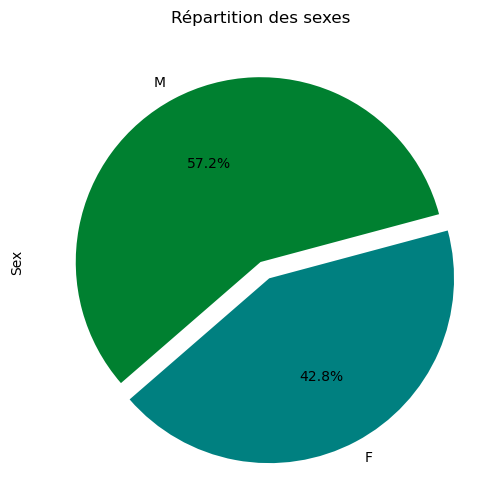

In [66]:
colors = ['#008030', '#008080', '#00A86B', '#4CAF50', '#7CFC00']

plt.figure(figsize=(6,6))
base_summer_2000_net['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,startangle=15, colors = colors)
plt.title('Répartition des sexes')
plt.show()

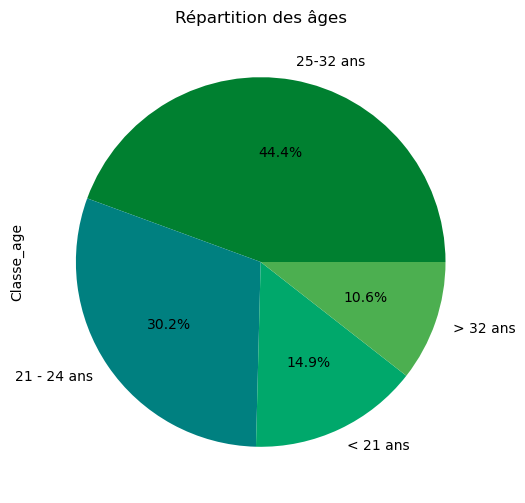

In [70]:
plt.figure(figsize=(6,6))
base_summer_2000_net['Classe_age'].value_counts().plot.pie(colors = colors,autopct='%1.1f%%')
plt.title('Répartition des âges')
plt.show()

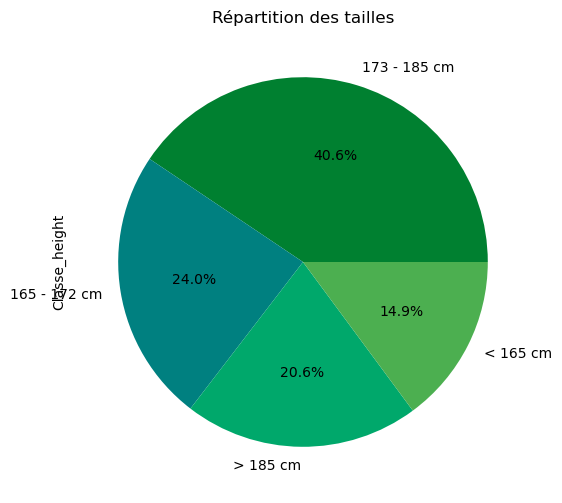

In [71]:
plt.figure(figsize=(6,6))
base_summer_2000_net['Classe_height'].value_counts().plot.pie(colors = colors, autopct='%1.1f%%')
plt.title('Répartition des tailles')
plt.show()

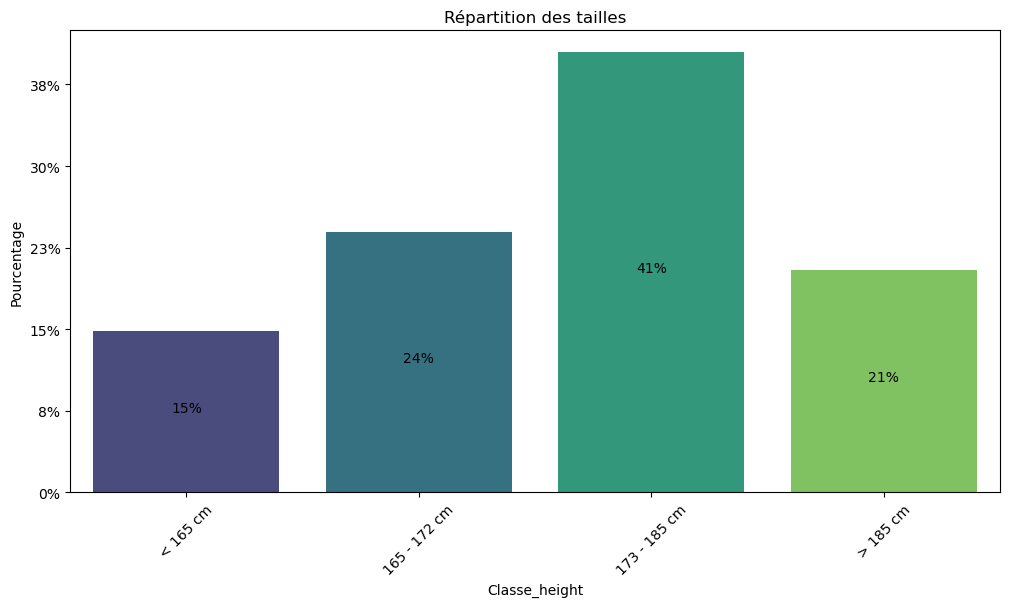

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

# Comptez les occurrences de chaque catégorie
total = float(len(base_summer_2000_net["Classe_height"]))

# Utilisez sns.countplot pour afficher le graphique à barres
ax = sns.countplot(x="Classe_height", data=base_summer_2000_net, palette='viridis')

# Modifiez l'axe y pour être en pourcentage
def percent_formatter(x, pos):
    return f'{(x / total):.0%}'

ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Ajoutez les pourcentages au centre des barres
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2,
            '{:.0%}'.format(height / total), ha="center")

plt.title('Répartition des tailles')
plt.xlabel("Classe_height")
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.show()



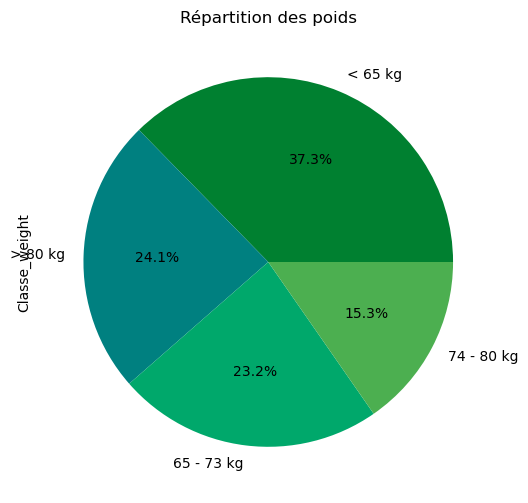

In [72]:
plt.figure(figsize=(6,6))
base_summer_2000_net['Classe_weight'].value_counts().plot.pie(colors = colors, autopct='%1.1f%%')
plt.title('Répartition des poids')
plt.show()

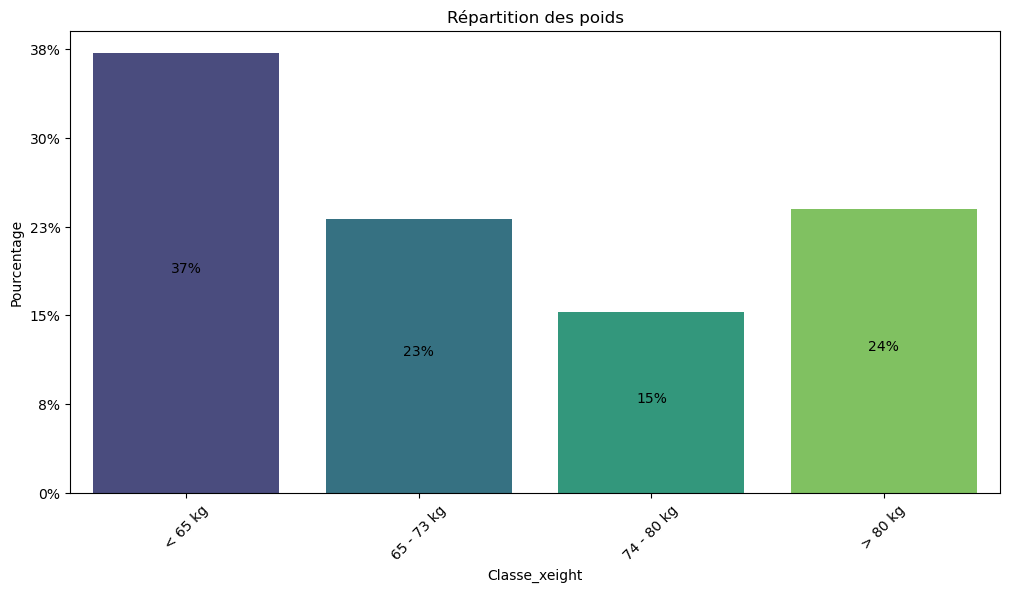

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

# Comptez les occurrences de chaque catégorie
total = float(len(base_summer_2000_net["Classe_weight"]))

# Utilisez sns.countplot pour afficher le graphique à barres
ax = sns.countplot(x="Classe_weight", data=base_summer_2000_net, palette='viridis')

# Modifiez l'axe y pour être en pourcentage
def percent_formatter(x, pos):
    return f'{(x / total):.0%}'

ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Ajoutez les pourcentages au centre des barres
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2,
            '{:.0%}'.format(height / total), ha="center")

plt.title('Répartition des poids')
plt.xlabel("Classe_xeight")
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.show()



In [84]:
import pandas as pd

# Supposons que votre DataFrame s'appelle 'base_summer_2000_net'
# Remplacez 'base_summer_2000_net' par le nom de votre DataFrame si nécessaire

# Créer un DataFrame pour le nombre d'individus par pays
tableau_noc = base_summer_2000_net.groupby('NOC').size().reset_index(name='Nombre d\'individus')

# Trier le tableau par le nombre d'individus de manière décroissante
tableau_noc_trie = tableau_noc.sort_values(by='Nombre d\'individus', ascending=False)

# Sélectionner les 15 premiers
les_16_premiers = tableau_noc_trie.head(16)

# Afficher les 15 premiers pays les plus représentés
les_16_premiers


,NOC,Nombre d'individus
201,USA,3645
11,AUS,2963
73,GER,2760
161,RUS,2738
39,CHN,2635
69,GBR,2344
65,FRA,2312
94,ITA,2155
98,JPN,2038
34,CAN,2018


## statistique bivarié

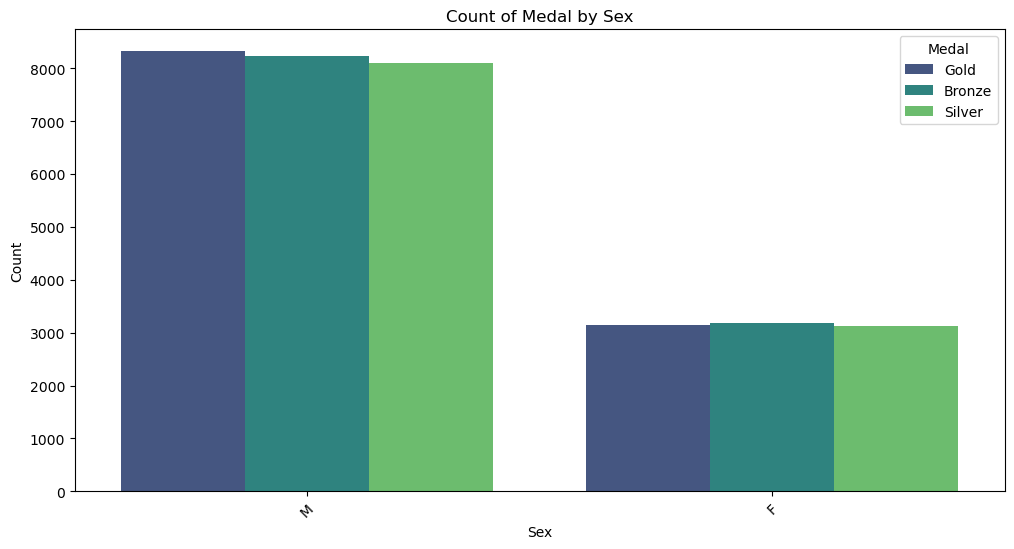

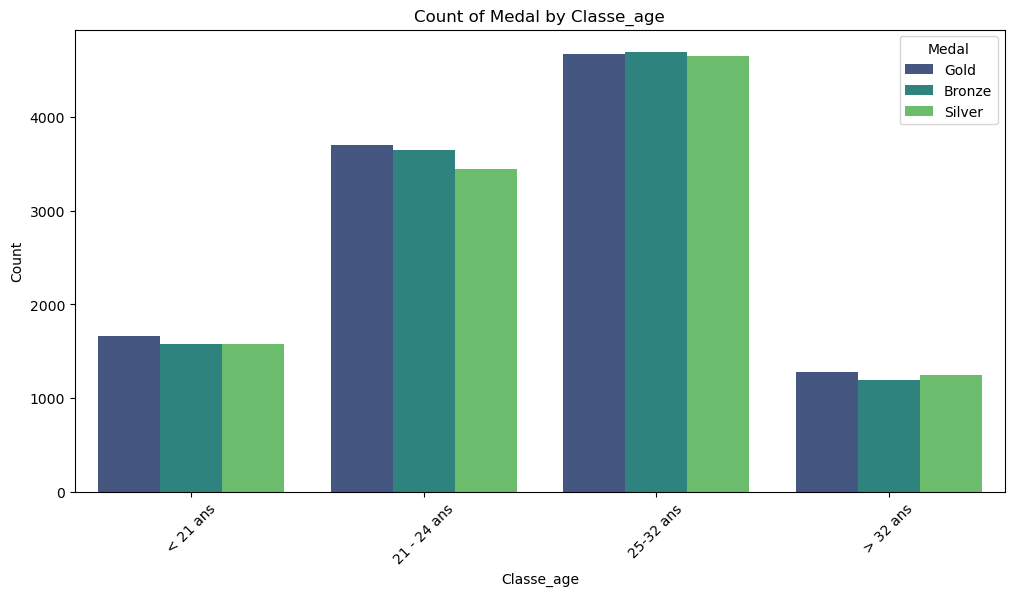

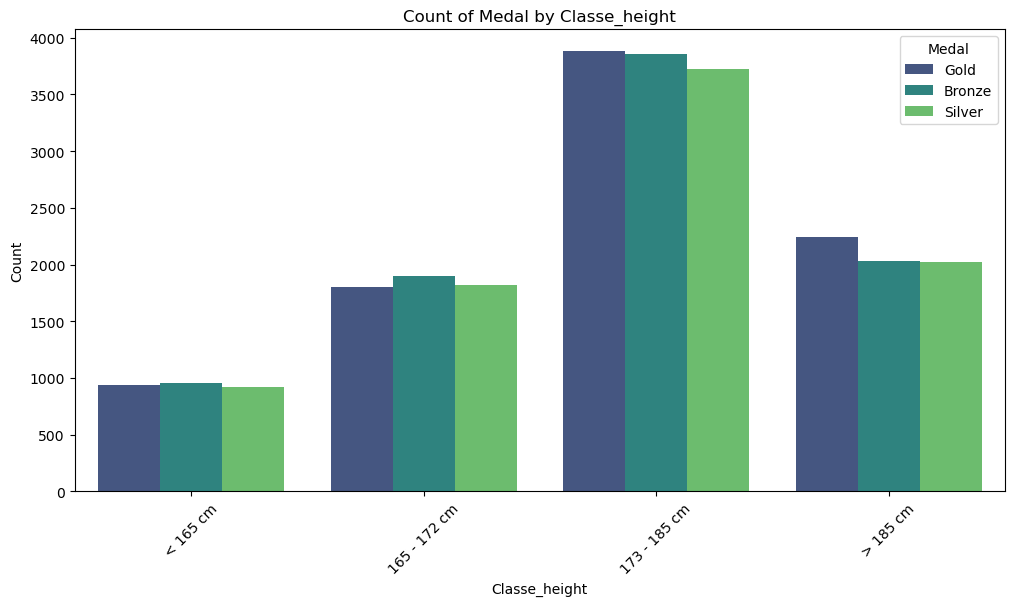

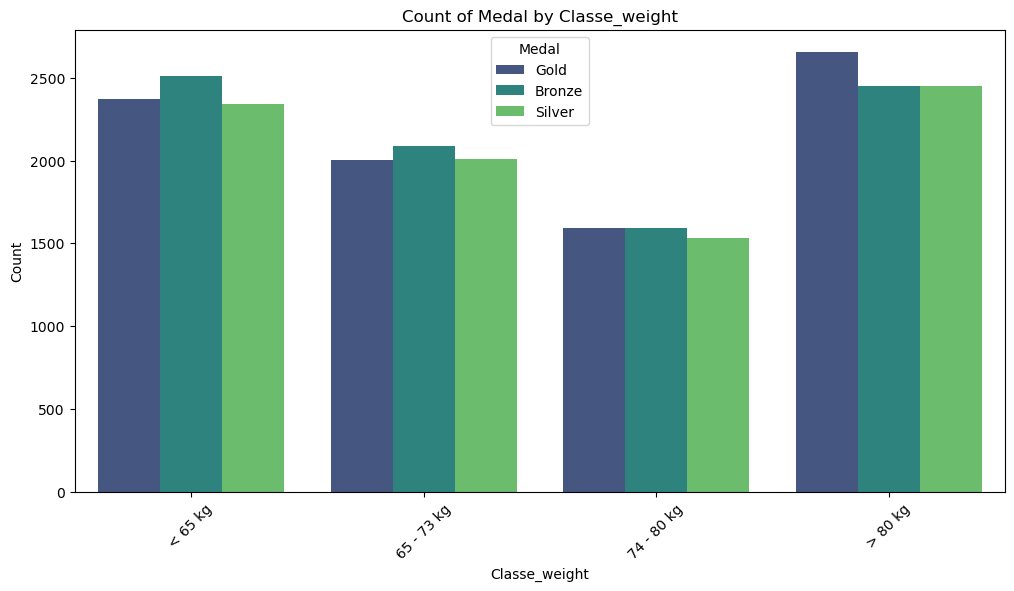

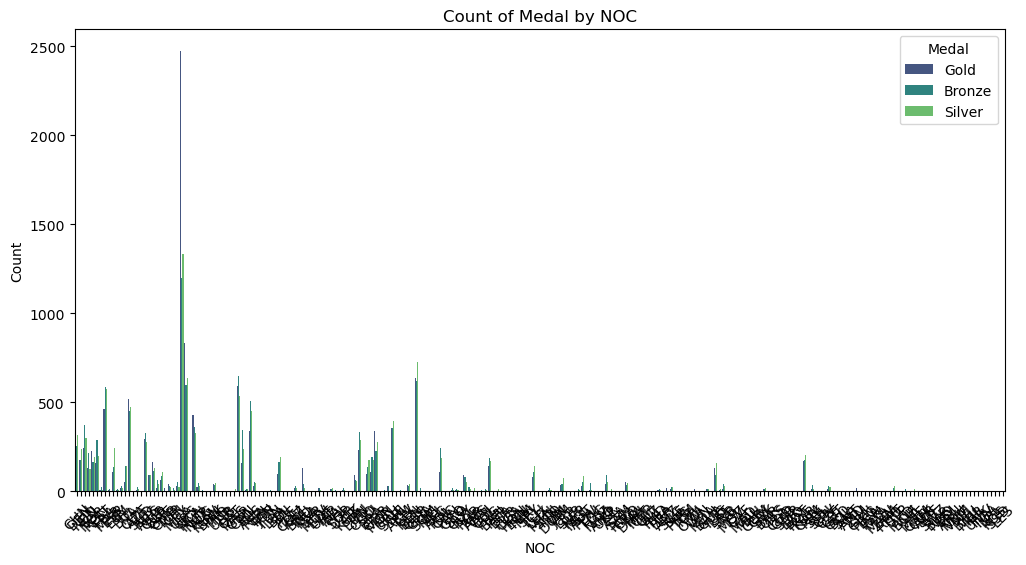

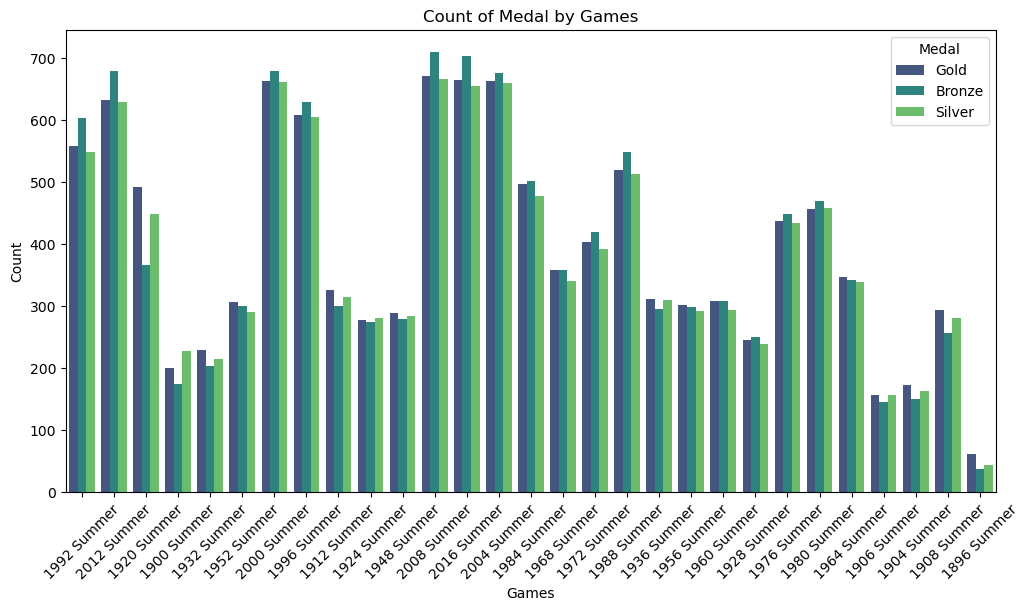

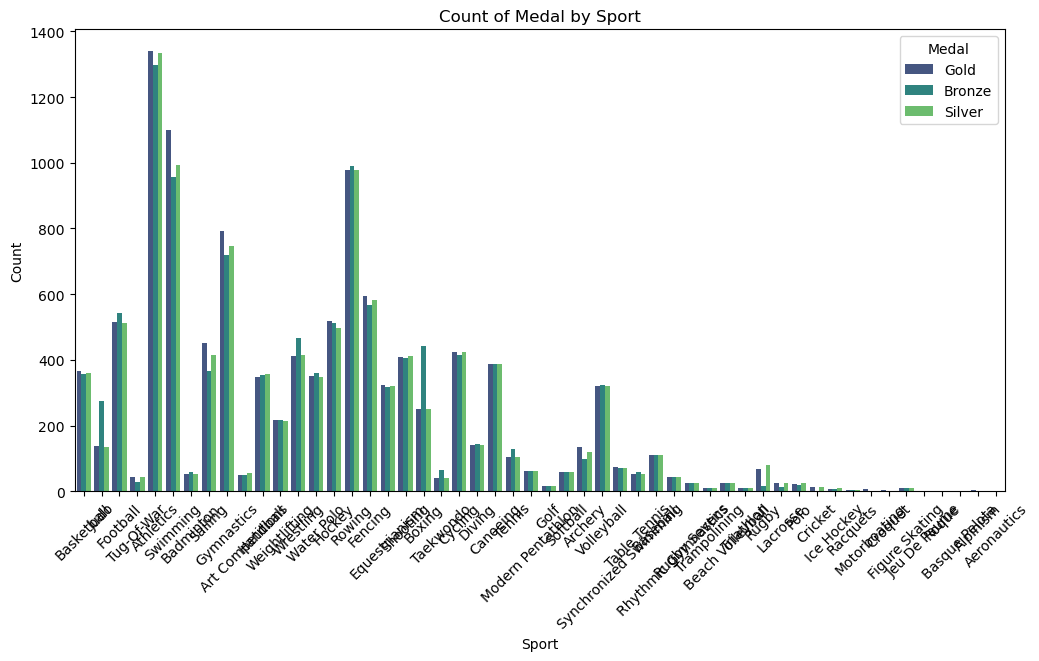

KeyboardInterrupt: 

In [55]:
#statistiques desc
import seaborn as sns
import matplotlib.pyplot as plt

def create_bar_plot(data, x_variable, target_variable='Medal'):

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.countplot(x=x_variable, hue=target_variable, data=data, palette='viridis')
    plt.title(f'Count of {target_variable} by {x_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=target_variable)
    plt.show()

# Example usage:
# Assuming your DataFrame is named df
create_bar_plot(base_summer, 'Sex')
create_bar_plot(base_summer, 'Classe_age')
create_bar_plot(base_summer, 'Classe_height')
create_bar_plot(base_summer, 'Classe_weight')
create_bar_plot(base_summer, 'NOC')
create_bar_plot(base_summer, 'Games')
create_bar_plot(base_summer, 'Sport')

